# HYPOTHESIS

I think the Logistic Regression(Discrete) will be best for both Scaled and Unscaled data because this data is looking for the probability a client would be high or low risk.  

In [1]:
# standard libraries
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)
import matplotlib.pyplot as plt

# processing libraries
from sklearn.preprocessing import StandardScaler

# metrics
from sklearn.metrics import confusion_matrix, classification_report

In [2]:
train_df = pd.read_csv('Resources/2019loans.csv')
test_df = pd.read_csv('Resources/2020Q1loans.csv')

In [3]:
train_df.head()

,Unnamed: 0,index,loan_amnt,int_rate,installment,home_ownership,annual_inc,verification_status,loan_status,pymnt_plan,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_inq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,debt_settlement_flag
0,57107,57107,13375.0,0.1797,483.34,MORTGAGE,223000.0,Not Verified,low_risk,n,29.99,0.0,0.0,15.0,0.0,39728.0,38.0,w,12804.66,12804.66,953.33,953.33,570.34,382.99,0.0,0.0,0.0,483.34,0.0,1.0,Individual,0.0,0.0,465790.0,2.0,7.0,3.0,7.0,7.0,82290.0,70.0,1.0,1.0,24683.0,69.0,60200.0,1.0,12.0,2.0,9.0,31053.0,7317.0,77.1,0.0,0.0,160.0,350.0,3.0,3.0,1.0,3.0,8.0,0.0,1.0,4.0,2.0,5.0,18.0,7.0,17.0,4.0,15.0,0.0,0.0,0.0,5.0,100.0,50.0,0.0,0.0,577150.0,122018.0,32000.0,170200.0,N,N
1,141451,141451,21000.0,0.1308,478.68,MORTGAGE,123000.0,Source Verified,low_risk,n,11.26,2.0,0.0,16.0,0.0,9585.0,20.0,w,15152.97,15152.97,10037.02,10037.02,5847.03,4189.99,0.0,0.0,0.0,478.68,0.0,1.0,Individual,0.0,0.0,60769.0,0.0,2.0,0.0,1.0,17.0,18311.0,52.0,0.0,4.0,4311.0,50.0,20900.0,1.0,0.0,1.0,5.0,3798.0,6990.0,56.0,0.0,0.0,165.0,142.0,13.0,13.0,1.0,17.0,10.0,1.0,5.0,8.0,6.0,7.0,5.0,13.0,14.0,8.0,16.0,0.0,0.0,0.0,0.0,85.0,33.3,0.0,0.0,132750.0,27896.0,15900.0,35398.0,N,N
2,321143,321143,20000.0,0.1240,448.95,MORTGAGE,197000.0,Source Verified,low_risk,n,11.28,0.0,0.0,12.0,0.0,16708.0,36.0,w,15724.23,15724.23,6971.52,6971.52,4275.77,2695.75,0.0,0.0,0.0,448.95,0.0,1.0,Individual,0.0,0.0,617946.0,1.0,7.0,1.0,2.0,5.0,97335.0,108.0,0.0,0.0,11026.0,98.0,25900.0,2.0,0.0,2.0,3.0,51496.0,5892.0,73.9,0.0,0.0,254.0,239.0,30.0,5.0,3.0,173.0,5.0,1.0,3.0,3.0,3.0,5.0,26.0,4.0,7.0,3.0,12.0,0.0,0.0,0.0,1.0,85.7,33.3,0.0,0.0,628160.0,114043.0,22600.0,90340.0,N,N
3,11778,11778,3000.0,0.1240,100.22,RENT,45000.0,Not Verified,low_risk,n,18.08,0.0,0.0,12.0,1.0,8809.0,19.0,w,2930.77,2930.77,81.63,81.63,69.23,12.40,0.0,0.0,0.0,85.76,1.0,1.0,Individual,0.0,568.0,20761.0,2.0,4.0,2.0,2.0,8.0,11952.0,78.0,2.0,4.0,2409.0,49.0,26600.0,4.0,4.0,2.0,6.0,1730.0,13470.0,32.3,0.0,0.0,135.0,146.0,2.0,2.0,0.0,2.0,8.0,0.0,5.0,6.0,6.0,6.0,8.0,8.0,11.0,6.0,12.0,0.0,0.0,0.0,4.0,100.0,16.7,1.0,0.0,42006.0,20761.0,19900.0,15406.0,N,N
4,169382,169382,30000.0,0.1612,1056.49,MORTGAGE,133000.0,Source Verified,low_risk,n,27.77,0.0,2.0,13.0,0.0,65420.0,51.0,w,20778.03,20778.03,14763.99,14763.99,9221.97,5542.02,0.0,0.0,0.0,1056.49,0.0,1.0,Individual,0.0,0.0,237839.0,2.0,3.0,1.0,3.0,5.0,43636.0,74.0,1.0,1.0,19804.0,74.0,88100.0,2.0,11.0,3.0,4.0,18295.0,18517.0,76.7,0.0,0.0,174.0,369.0,1.0,1.0,2.0,34.0,0.0,0.0,6.0,9.0,6.0,19.0,17.0,9.0,32.0,9.0,13.0,0.0,0.0,0.0,2.0,100.0,66.7,0.0,0.0,283248.0,109056.0,79500.0,58778.0,N,N


In [4]:
train_df.describe()

,Unnamed: 0,index,loan_amnt,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,policy_code,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_inq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,12180.000000,12180.000000,12180.000000,12180.000000,12180.000000,1.218000e+04,12180.000000,12180.000000,12180.000000,12180.000000,12180.00000,12180.000000,12180.000000,12180.000000,12180.000000,12180.000000,12180.000000,12180.000000,12180.000000,12180.000000,12180.0,12180.0,12180.000000,12180.000000,12180.0,12180.000000,12180.000000,1.218000e+04,12180.000000,12180.000000,12180.000000,12180.000000,12180.000000,12180.000000,12180.000000,12180.000000,12180.000000,12180.000000,12180.000000,1.218000e+04,12180.000000,12180.000000,12180.000000,12180.000000,12180.000000,12180.000000,12180.000000,12180.000000,12180.000000,12180.000000,12180.000000,12180.000000,12180.000000,12180.000000,12180.000000,12180.000000,12180.000000,12180.000000,12180.000000,12180.000000,12180.000000,12180.000000,12180.000000,12180.000000,12180.000000,12180.000000,12180.0,12180.000000,12180.000000,12180.000000,12180.000000,12180.000000,12180.00000,12180.0,1.218000e+04,12180.000000,12180.000000,1.218000e+04
mean,187893.694745,187893.694745,17399.579228,0.140899,509.150241,8.989320e+04,22.589516,0.256979,0.566502,12.680296,0.11601,17593.681773,24.398522,13431.612526,13430.333733,6382.471844,6381.744212,3967.966703,2412.603877,1.901265,0.0,0.0,438.597455,0.020115,1.0,0.000082,185.009031,1.555372e+05,1.051970,3.349261,0.874713,1.977750,14.005008,44328.780542,70.460099,1.353448,2.788424,6101.435304,57.726437,4.048456e+04,1.452135,1.699343,2.328818,5.052627,13241.365107,15394.839984,50.421872,0.005337,0.001232,124.043842,164.242939,13.708949,6.911658,1.294253,22.812151,7.213711,0.525944,3.984647,5.847701,5.266502,7.332594,9.611002,8.718144,13.278161,5.853859,12.666585,0.0,0.000082,0.063300,2.362890,94.510148,33.054130,0.11601,0.0,1.989801e+05,62404.817980,28038.013136,5.622215e+04
std,99710.342179,99710.342179,10238.160884,0.052679,294.617726,1.684370e+05,23.903223,0.803027,0.814674,6.154663,0.32960,22602.217861,12.555693,8785.098800,8785.817001,4963.811515,4963.738304,3676.345410,2096.113616,12.593238,0.0,0.0,829.311869,0.151103,0.0,0.009061,1324.251148,1.717668e+05,1.207107,3.095097,0.992740,1.601455,13.564910,51221.831778,22.175323,1.568990,2.672196,5377.854020,18.283511,3.915050e+04,1.598841,2.937633,2.485595,3.328317,15129.067502,18750.675225,28.027011,0.075080,0.135915,59.754444,97.388524,16.507608,6.033495,1.675434,29.937667,5.960890,1.463372,2.556274,3.527012,3.300692,4.580288,7.826999,5.142037,7.998417,3.529890,6.152661,0.0,0.009061,0.425228,1.987853,8.889650,33.889522,0.32960,0.0,1.923892e+05,58987.382738,25331.908015,5.207485e+04
min,24.000000,24.000000,1000.000000,0.060000,30.890000,5.000000e+02,0.100000,0.000000,0.000000,2.000000,0.00000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,-1260.780000,0.000000,1.0,0.000000,0.000000,1.755000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,31.000000,0.000000,0.000000,0.0000

In [5]:
train_df.describe()

,Unnamed: 0,index,loan_amnt,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,policy_code,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_inq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,12180.000000,12180.000000,12180.000000,12180.000000,12180.000000,1.218000e+04,12180.000000,12180.000000,12180.000000,12180.000000,12180.00000,12180.000000,12180.000000,12180.000000,12180.000000,12180.000000,12180.000000,12180.000000,12180.000000,12180.000000,12180.0,12180.0,12180.000000,12180.000000,12180.0,12180.000000,12180.000000,1.218000e+04,12180.000000,12180.000000,12180.000000,12180.000000,12180.000000,12180.000000,12180.000000,12180.000000,12180.000000,12180.000000,12180.000000,1.218000e+04,12180.000000,12180.000000,12180.000000,12180.000000,12180.000000,12180.000000,12180.000000,12180.000000,12180.000000,12180.000000,12180.000000,12180.000000,12180.000000,12180.000000,12180.000000,12180.000000,12180.000000,12180.000000,12180.000000,12180.000000,12180.000000,12180.000000,12180.000000,12180.000000,12180.000000,12180.000000,12180.0,12180.000000,12180.000000,12180.000000,12180.000000,12180.000000,12180.00000,12180.0,1.218000e+04,12180.000000,12180.000000,1.218000e+04
mean,187893.694745,187893.694745,17399.579228,0.140899,509.150241,8.989320e+04,22.589516,0.256979,0.566502,12.680296,0.11601,17593.681773,24.398522,13431.612526,13430.333733,6382.471844,6381.744212,3967.966703,2412.603877,1.901265,0.0,0.0,438.597455,0.020115,1.0,0.000082,185.009031,1.555372e+05,1.051970,3.349261,0.874713,1.977750,14.005008,44328.780542,70.460099,1.353448,2.788424,6101.435304,57.726437,4.048456e+04,1.452135,1.699343,2.328818,5.052627,13241.365107,15394.839984,50.421872,0.005337,0.001232,124.043842,164.242939,13.708949,6.911658,1.294253,22.812151,7.213711,0.525944,3.984647,5.847701,5.266502,7.332594,9.611002,8.718144,13.278161,5.853859,12.666585,0.0,0.000082,0.063300,2.362890,94.510148,33.054130,0.11601,0.0,1.989801e+05,62404.817980,28038.013136,5.622215e+04
std,99710.342179,99710.342179,10238.160884,0.052679,294.617726,1.684370e+05,23.903223,0.803027,0.814674,6.154663,0.32960,22602.217861,12.555693,8785.098800,8785.817001,4963.811515,4963.738304,3676.345410,2096.113616,12.593238,0.0,0.0,829.311869,0.151103,0.0,0.009061,1324.251148,1.717668e+05,1.207107,3.095097,0.992740,1.601455,13.564910,51221.831778,22.175323,1.568990,2.672196,5377.854020,18.283511,3.915050e+04,1.598841,2.937633,2.485595,3.328317,15129.067502,18750.675225,28.027011,0.075080,0.135915,59.754444,97.388524,16.507608,6.033495,1.675434,29.937667,5.960890,1.463372,2.556274,3.527012,3.300692,4.580288,7.826999,5.142037,7.998417,3.529890,6.152661,0.0,0.009061,0.425228,1.987853,8.889650,33.889522,0.32960,0.0,1.923892e+05,58987.382738,25331.908015,5.207485e+04
min,24.000000,24.000000,1000.000000,0.060000,30.890000,5.000000e+02,0.100000,0.000000,0.000000,2.000000,0.00000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,-1260.780000,0.000000,1.0,0.000000,0.000000,1.755000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,31.000000,0.000000,0.000000,0.0000

In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12180 entries, 0 to 12179
Data columns (total 86 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Unnamed: 0                  12180 non-null  int64  
 1   index                       12180 non-null  int64  
 2   loan_amnt                   12180 non-null  float64
 3   int_rate                    12180 non-null  float64
 4   installment                 12180 non-null  float64
 5   home_ownership              12180 non-null  object 
 6   annual_inc                  12180 non-null  float64
 7   verification_status         12180 non-null  object 
 8   loan_status                 12180 non-null  object 
 9   pymnt_plan                  12180 non-null  object 
 10  dti                         12180 non-null  float64
 11  delinq_2yrs                 12180 non-null  float64
 12  inq_last_6mths              12180 non-null  float64
 13  open_acc                    121

In [7]:
test_df.head()

,Unnamed: 0,index,loan_amnt,int_rate,installment,home_ownership,annual_inc,verification_status,loan_status,pymnt_plan,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_inq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,debt_settlement_flag
0,67991,67991,40000.0,0.0819,814.70,MORTGAGE,140000.0,Not Verified,low_risk,n,19.75,0.0,1.0,18.0,0.0,9471.0,45.0,w,33249.95,33249.95,9740.00,9740.00,6750.05,2989.95,0.0,0.0,0.0,814.70,0.0,1.0,Individual,0.0,0.0,377773.0,1.0,6.0,1.0,2.0,9.0,61443.0,51.0,1.0,1.0,3218.0,26.0,86500.0,0.0,2.0,1.0,3.0,20987.0,65129.0,12.7,0.0,0.0,192.0,180.0,2.0,2.0,3.0,44.0,2.0,0.0,6.0,6.0,6.0,10.0,20.0,11.0,22.0,6.0,18.0,0.0,0.0,0.0,2.0,97.7,0.0,0.0,0.0,527975.0,70914.0,74600.0,99475.0,N,N
1,25429,25429,6000.0,0.1524,208.70,RENT,55000.0,Not Verified,low_risk,n,11.52,2.0,0.0,8.0,0.0,1280.0,12.0,w,0.00,0.00,6185.59,6185.59,6000.00,185.59,0.0,0.0,0.0,5773.27,0.0,1.0,Individual,0.0,0.0,23460.0,1.0,1.0,1.0,1.0,6.0,22180.0,94.0,0.0,1.0,713.0,68.0,11000.0,1.0,1.0,3.0,2.0,2933.0,4680.0,20.7,0.0,0.0,143.0,144.0,22.0,6.0,0.0,59.0,6.0,0.0,2.0,3.0,2.0,2.0,3.0,7.0,9.0,3.0,8.0,0.0,0.0,0.0,1.0,66.7,0.0,0.0,0.0,34628.0,23460.0,5900.0,23628.0,N,N
2,38496,38496,3600.0,0.1695,128.27,RENT,42000.0,Not Verified,low_risk,n,6.74,0.0,0.0,6.0,0.0,4757.0,6.0,w,0.00,0.00,3603.73,3603.73,3600.00,3.73,0.0,0.0,0.0,3607.12,0.0,1.0,Individual,0.0,0.0,19183.0,0.0,3.0,0.0,0.0,40.0,14426.0,96.0,1.0,2.0,4757.0,83.0,8100.0,0.0,0.0,2.0,2.0,3837.0,2543.0,65.2,0.0,0.0,54.0,107.0,9.0,9.0,0.0,9.0,7.0,0.0,1.0,1.0,2.0,2.0,3.0,3.0,3.0,1.0,6.0,0.0,0.0,0.0,1.0,100.0,0.0,0.0,0.0,23100.0,19183.0,7300.0,15000.0,N,N
3,19667,19667,20000.0,0.1524,478.33,RENT,100000.0,Not Verified,low_risk,n,12.13,0.0,2.0,7.0,0.0,12731.0,21.0,w,17624.06,17624.06,4766.37,4766.37,2375.94,2390.43,0.0,0.0,0.0,478.33,0.0,1.0,Individual,0.0,0.0,43817.0,1.0,2.0,1.0,3.0,11.0,31086.0,86.0,3.0,3.0,5917.0,78.0,20500.0,0.0,3.0,3.0,6.0,7303.0,6496.0,52.9,0.0,0.0,132.0,290.0,4.0,4.0,0.0,7.0,5.0,0.0,2.0,4.0,3.0,8.0,8.0,5.0,12.0,4.0,7.0,0.0,0.0,0.0,4.0,100.0,50.0,0.0,0.0,56481.0,43817.0,13800.0,35981.0,N,N
4,37505,37505,3600.0,0.1240,120.27,RENT,50000.0,Not Verified,low_risk,n,16.08,0.0,3.0,6.0,0.0,10413.0,6.0,w,0.00,0.00,3602.48,3602.48,3600.00,2.48,0.0,0.0,0.0,3604.96,0.0,1.0,Individual,0.0,0.0,32448.0,2.0,2.0,1.0,1.0,9.0,22035.0,88.0,2.0,2.0,5985.0,71.0,21000.0,3.0,1.0,14.0,3.0,5408.0,10587.0,49.6,0.0,0.0,40.0,159.0,3.0,3.0,0.0,3.0,3.0,0.0,4.0,4.0,4.0,4.0,2.0,4.0,4.0,4.0,6.0,0.0,0.0,0.0,3.0,100.0,25.0,0.0,0.0,45977.0,32448.0,21000.0,24977.0,N,N


In [8]:
test_df.describe()

,Unnamed: 0,index,loan_amnt,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,policy_code,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_inq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,4702.000000,4702.000000,4702.000000,4702.000000,4702.000000,4.702000e+03,4702.000000,4702.000000,4702.000000,4702.000000,4702.000000,4702.000000,4702.000000,4702.000000,4702.000000,4702.000000,4702.000000,4702.000000,4702.000000,4702.000000,4702.000000,4702.000000,4702.000000,4702.000000,4702.0,4702.000000,4702.000000,4.702000e+03,4702.000000,4702.000000,4702.000000,4702.000000,4702.000000,4702.000000,4702.000000,4702.000000,4702.000000,4702.000000,4702.000000,4702.000000,4702.000000,4702.000000,4702.000000,4702.000000,4702.000000,4702.000000,4702.000000,4702.000000,4702.000000,4702.000000,4702.000000,4702.000000,4702.000000,4702.000000,4702.000000,4702.000000,4702.000000,4702.000000,4702.000000,4702.000000,4702.000000,4702.00000,4702.000000,4702.000000,4702.000000,4702.000000,4702.000000,4702.000000,4702.000000,4702.000000,4702.000000,4702.000000,4702.000000,4702.0,4.702000e+03,4702.000000,4702.000000,4702.000000
mean,40848.125479,40848.125479,16983.889834,0.147490,503.512114,8.677217e+04,22.984243,0.205444,0.701616,12.709911,0.103360,18558.165036,24.559336,9859.251978,9857.578881,4951.444618,4950.090234,3321.047778,1521.408433,0.104732,108.883652,18.450610,1239.854162,0.017014,1.0,0.000425,176.335389,1.510951e+05,1.218630,3.288813,0.970651,2.089536,13.164398,43600.411314,71.399405,1.411740,2.796257,6491.894088,57.846023,42877.127818,1.513186,1.670140,2.459804,5.176521,12864.377499,17015.099319,49.700829,0.006806,0.108677,122.097193,161.775840,13.175032,6.343258,1.271161,21.627605,6.510634,0.451935,4.115483,5.864526,5.549766,7.767971,9.45789,8.824543,13.612718,5.880902,12.697150,0.000213,0.000213,0.049979,2.532539,95.322310,32.394173,0.103360,0.0,1.954170e+05,62753.955764,30585.559336,55616.824543
std,22099.925238,22099.925238,10122.727799,0.057906,293.240156,5.802277e+04,21.162972,0.634326,0.901247,6.046306,0.309313,22488.773061,12.419551,9907.142099,9906.224299,5088.168686,5085.757539,4732.637686,1289.893381,2.016307,734.740160,106.450403,4098.636194,0.157517,0.0,0.020622,1047.429039,1.713338e+05,1.324683,2.887444,1.051933,1.628774,14.882722,48446.716656,21.818253,1.600287,2.621269,6388.655372,18.561365,37671.555773,1.543573,2.935359,2.426012,3.338440,15441.008583,20529.069655,28.267256,0.096506,7.208410,60.445307,97.297365,16.386206,5.585178,1.701837,31.297690,5.584930,1.345981,2.610677,3.599638,3.397067,4.674967,7.44780,5.183636,8.214314,3.600128,6.045786,0.014583,0.014583,0.303582,2.048161,7.941194,33.168723,0.309313,0.0,1.905403e+05,55695.287834,27664.330803,49447.248867
min,31.000000,31.000000,1000.000000,0.064600,31.140000,1.000000e+02,0.710000,0.000000,0.000000,2.000000,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1020.800000,0.000000,1.0,0.000000,0.000000,1.554000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,134.000000,2.000000,0.000000,0.000000,0.000000

In [9]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4702 entries, 0 to 4701
Data columns (total 86 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Unnamed: 0                  4702 non-null   int64  
 1   index                       4702 non-null   int64  
 2   loan_amnt                   4702 non-null   float64
 3   int_rate                    4702 non-null   float64
 4   installment                 4702 non-null   float64
 5   home_ownership              4702 non-null   object 
 6   annual_inc                  4702 non-null   float64
 7   verification_status         4702 non-null   object 
 8   loan_status                 4702 non-null   object 
 9   pymnt_plan                  4702 non-null   object 
 10  dti                         4702 non-null   float64
 11  delinq_2yrs                 4702 non-null   float64
 12  inq_last_6mths              4702 non-null   float64
 13  open_acc                    4702 

In [10]:
#Observation #1
#Train/Test Split- 70/30
len(train_df) / (len(train_df) + len(test_df))

0.7214784978083165

In [11]:
#Observation #2
#Evaluate Target- Equal class size- Don't want skewed model 
train_df.loan_status.value_counts()

high_risk    6090
low_risk     6090
Name: loan_status, dtype: int64

In [12]:
test_df.loan_status.value_counts()

low_risk     2351
high_risk    2351
Name: loan_status, dtype: int64

In [13]:
# Label encode the target
train_df["loan_status"] = [1 if x == "high_risk" else 0 for x in train_df.loan_status]
test_df["loan_status"] = [1 if x == "high_risk" else 0 for x in test_df.loan_status]

In [14]:
train_df.head()

,Unnamed: 0,index,loan_amnt,int_rate,installment,home_ownership,annual_inc,verification_status,loan_status,pymnt_plan,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_inq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,debt_settlement_flag
0,57107,57107,13375.0,0.1797,483.34,MORTGAGE,223000.0,Not Verified,0,n,29.99,0.0,0.0,15.0,0.0,39728.0,38.0,w,12804.66,12804.66,953.33,953.33,570.34,382.99,0.0,0.0,0.0,483.34,0.0,1.0,Individual,0.0,0.0,465790.0,2.0,7.0,3.0,7.0,7.0,82290.0,70.0,1.0,1.0,24683.0,69.0,60200.0,1.0,12.0,2.0,9.0,31053.0,7317.0,77.1,0.0,0.0,160.0,350.0,3.0,3.0,1.0,3.0,8.0,0.0,1.0,4.0,2.0,5.0,18.0,7.0,17.0,4.0,15.0,0.0,0.0,0.0,5.0,100.0,50.0,0.0,0.0,577150.0,122018.0,32000.0,170200.0,N,N
1,141451,141451,21000.0,0.1308,478.68,MORTGAGE,123000.0,Source Verified,0,n,11.26,2.0,0.0,16.0,0.0,9585.0,20.0,w,15152.97,15152.97,10037.02,10037.02,5847.03,4189.99,0.0,0.0,0.0,478.68,0.0,1.0,Individual,0.0,0.0,60769.0,0.0,2.0,0.0,1.0,17.0,18311.0,52.0,0.0,4.0,4311.0,50.0,20900.0,1.0,0.0,1.0,5.0,3798.0,6990.0,56.0,0.0,0.0,165.0,142.0,13.0,13.0,1.0,17.0,10.0,1.0,5.0,8.0,6.0,7.0,5.0,13.0,14.0,8.0,16.0,0.0,0.0,0.0,0.0,85.0,33.3,0.0,0.0,132750.0,27896.0,15900.0,35398.0,N,N
2,321143,321143,20000.0,0.1240,448.95,MORTGAGE,197000.0,Source Verified,0,n,11.28,0.0,0.0,12.0,0.0,16708.0,36.0,w,15724.23,15724.23,6971.52,6971.52,4275.77,2695.75,0.0,0.0,0.0,448.95,0.0,1.0,Individual,0.0,0.0,617946.0,1.0,7.0,1.0,2.0,5.0,97335.0,108.0,0.0,0.0,11026.0,98.0,25900.0,2.0,0.0,2.0,3.0,51496.0,5892.0,73.9,0.0,0.0,254.0,239.0,30.0,5.0,3.0,173.0,5.0,1.0,3.0,3.0,3.0,5.0,26.0,4.0,7.0,3.0,12.0,0.0,0.0,0.0,1.0,85.7,33.3,0.0,0.0,628160.0,114043.0,22600.0,90340.0,N,N
3,11778,11778,3000.0,0.1240,100.22,RENT,45000.0,Not Verified,0,n,18.08,0.0,0.0,12.0,1.0,8809.0,19.0,w,2930.77,2930.77,81.63,81.63,69.23,12.40,0.0,0.0,0.0,85.76,1.0,1.0,Individual,0.0,568.0,20761.0,2.0,4.0,2.0,2.0,8.0,11952.0,78.0,2.0,4.0,2409.0,49.0,26600.0,4.0,4.0,2.0,6.0,1730.0,13470.0,32.3,0.0,0.0,135.0,146.0,2.0,2.0,0.0,2.0,8.0,0.0,5.0,6.0,6.0,6.0,8.0,8.0,11.0,6.0,12.0,0.0,0.0,0.0,4.0,100.0,16.7,1.0,0.0,42006.0,20761.0,19900.0,15406.0,N,N
4,169382,169382,30000.0,0.1612,1056.49,MORTGAGE,133000.0,Source Verified,0,n,27.77,0.0,2.0,13.0,0.0,65420.0,51.0,w,20778.03,20778.03,14763.99,14763.99,9221.97,5542.02,0.0,0.0,0.0,1056.49,0.0,1.0,Individual,0.0,0.0,237839.0,2.0,3.0,1.0,3.0,5.0,43636.0,74.0,1.0,1.0,19804.0,74.0,88100.0,2.0,11.0,3.0,4.0,18295.0,18517.0,76.7,0.0,0.0,174.0,369.0,1.0,1.0,2.0,34.0,0.0,0.0,6.0,9.0,6.0,19.0,17.0,9.0,32.0,9.0,13.0,0.0,0.0,0.0,2.0,100.0,66.7,0.0,0.0,283248.0,109056.0,79500.0,58778.0,N,N


In [15]:
test_df.head()

,Unnamed: 0,index,loan_amnt,int_rate,installment,home_ownership,annual_inc,verification_status,loan_status,pymnt_plan,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_inq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,debt_settlement_flag
0,67991,67991,40000.0,0.0819,814.70,MORTGAGE,140000.0,Not Verified,0,n,19.75,0.0,1.0,18.0,0.0,9471.0,45.0,w,33249.95,33249.95,9740.00,9740.00,6750.05,2989.95,0.0,0.0,0.0,814.70,0.0,1.0,Individual,0.0,0.0,377773.0,1.0,6.0,1.0,2.0,9.0,61443.0,51.0,1.0,1.0,3218.0,26.0,86500.0,0.0,2.0,1.0,3.0,20987.0,65129.0,12.7,0.0,0.0,192.0,180.0,2.0,2.0,3.0,44.0,2.0,0.0,6.0,6.0,6.0,10.0,20.0,11.0,22.0,6.0,18.0,0.0,0.0,0.0,2.0,97.7,0.0,0.0,0.0,527975.0,70914.0,74600.0,99475.0,N,N
1,25429,25429,6000.0,0.1524,208.70,RENT,55000.0,Not Verified,0,n,11.52,2.0,0.0,8.0,0.0,1280.0,12.0,w,0.00,0.00,6185.59,6185.59,6000.00,185.59,0.0,0.0,0.0,5773.27,0.0,1.0,Individual,0.0,0.0,23460.0,1.0,1.0,1.0,1.0,6.0,22180.0,94.0,0.0,1.0,713.0,68.0,11000.0,1.0,1.0,3.0,2.0,2933.0,4680.0,20.7,0.0,0.0,143.0,144.0,22.0,6.0,0.0,59.0,6.0,0.0,2.0,3.0,2.0,2.0,3.0,7.0,9.0,3.0,8.0,0.0,0.0,0.0,1.0,66.7,0.0,0.0,0.0,34628.0,23460.0,5900.0,23628.0,N,N
2,38496,38496,3600.0,0.1695,128.27,RENT,42000.0,Not Verified,0,n,6.74,0.0,0.0,6.0,0.0,4757.0,6.0,w,0.00,0.00,3603.73,3603.73,3600.00,3.73,0.0,0.0,0.0,3607.12,0.0,1.0,Individual,0.0,0.0,19183.0,0.0,3.0,0.0,0.0,40.0,14426.0,96.0,1.0,2.0,4757.0,83.0,8100.0,0.0,0.0,2.0,2.0,3837.0,2543.0,65.2,0.0,0.0,54.0,107.0,9.0,9.0,0.0,9.0,7.0,0.0,1.0,1.0,2.0,2.0,3.0,3.0,3.0,1.0,6.0,0.0,0.0,0.0,1.0,100.0,0.0,0.0,0.0,23100.0,19183.0,7300.0,15000.0,N,N
3,19667,19667,20000.0,0.1524,478.33,RENT,100000.0,Not Verified,0,n,12.13,0.0,2.0,7.0,0.0,12731.0,21.0,w,17624.06,17624.06,4766.37,4766.37,2375.94,2390.43,0.0,0.0,0.0,478.33,0.0,1.0,Individual,0.0,0.0,43817.0,1.0,2.0,1.0,3.0,11.0,31086.0,86.0,3.0,3.0,5917.0,78.0,20500.0,0.0,3.0,3.0,6.0,7303.0,6496.0,52.9,0.0,0.0,132.0,290.0,4.0,4.0,0.0,7.0,5.0,0.0,2.0,4.0,3.0,8.0,8.0,5.0,12.0,4.0,7.0,0.0,0.0,0.0,4.0,100.0,50.0,0.0,0.0,56481.0,43817.0,13800.0,35981.0,N,N
4,37505,37505,3600.0,0.1240,120.27,RENT,50000.0,Not Verified,0,n,16.08,0.0,3.0,6.0,0.0,10413.0,6.0,w,0.00,0.00,3602.48,3602.48,3600.00,2.48,0.0,0.0,0.0,3604.96,0.0,1.0,Individual,0.0,0.0,32448.0,2.0,2.0,1.0,1.0,9.0,22035.0,88.0,2.0,2.0,5985.0,71.0,21000.0,3.0,1.0,14.0,3.0,5408.0,10587.0,49.6,0.0,0.0,40.0,159.0,3.0,3.0,0.0,3.0,3.0,0.0,4.0,4.0,4.0,4.0,2.0,4.0,4.0,4.0,6.0,0.0,0.0,0.0,3.0,100.0,25.0,0.0,0.0,45977.0,32448.0,21000.0,24977.0,N,N


In [16]:
#Evaluate Non-Numeric Categorical Data for training
train_df_2 = train_df.select_dtypes(include='object')
train_df_2.head()

,home_ownership,verification_status,pymnt_plan,initial_list_status,application_type,hardship_flag,debt_settlement_flag
0,MORTGAGE,Not Verified,n,w,Individual,N,N
1,MORTGAGE,Source Verified,n,w,Individual,N,N
2,MORTGAGE,Source Verified,n,w,Individual,N,N
3,RENT,Not Verified,n,w,Individual,N,N
4,MORTGAGE,Source Verified,n,w,Individual,N,N


In [17]:
for col in train_df_2.columns:
    print(train_df_2[col].value_counts())
    print()

MORTGAGE    5800
RENT        4944
OWN         1371
ANY           65
Name: home_ownership, dtype: int64

Not Verified       5301
Source Verified    4881
Verified           1998
Name: verification_status, dtype: int64

n    12180
Name: pymnt_plan, dtype: int64

w    11158
f     1022
Name: initial_list_status, dtype: int64

Individual    10400
Joint App      1780
Name: application_type, dtype: int64

N    11832
Y      348
Name: hardship_flag, dtype: int64

N    12175
Y        5
Name: debt_settlement_flag, dtype: int64



In [18]:
#Evaluate Non-Numeric Categorical Data for test
test_df_2 = test_df.select_dtypes(include='object')
test_df_2.head()

,home_ownership,verification_status,pymnt_plan,initial_list_status,application_type,hardship_flag,debt_settlement_flag
0,MORTGAGE,Not Verified,n,w,Individual,N,N
1,RENT,Not Verified,n,w,Individual,N,N
2,RENT,Not Verified,n,w,Individual,N,N
3,RENT,Not Verified,n,w,Individual,N,N
4,RENT,Not Verified,n,w,Individual,N,N


In [19]:
for col in test_df_2.columns:
    print(test_df_2[col].value_counts())
    print()
#Observation #3- There isnt a Y in the debt settlement test dataset

MORTGAGE    2131
RENT        2033
OWN          533
ANY            5
Name: home_ownership, dtype: int64

Not Verified       2454
Source Verified    1715
Verified            533
Name: verification_status, dtype: int64

n    4702
Name: pymnt_plan, dtype: int64

w    4377
f     325
Name: initial_list_status, dtype: int64

Individual    4165
Joint App      537
Name: application_type, dtype: int64

N    4621
Y      81
Name: hardship_flag, dtype: int64

N    4702
Name: debt_settlement_flag, dtype: int64



In [ ]:
# Convert categorical data to numeric and separate target feature for training data

In [20]:
train_df_3 = pd.get_dummies(train_df_2)
train_df_3.head()

,home_ownership_ANY,home_ownership_MORTGAGE,home_ownership_OWN,home_ownership_RENT,verification_status_Not Verified,verification_status_Source Verified,verification_status_Verified,pymnt_plan_n,initial_list_status_f,initial_list_status_w,application_type_Individual,application_type_Joint App,hardship_flag_N,hardship_flag_Y,debt_settlement_flag_N,debt_settlement_flag_Y
0,0,1,0,0,1,0,0,1,0,1,1,0,1,0,1,0
1,0,1,0,0,0,1,0,1,0,1,1,0,1,0,1,0
2,0,1,0,0,0,1,0,1,0,1,1,0,1,0,1,0
3,0,0,0,1,1,0,0,1,0,1,1,0,1,0,1,0
4,0,1,0,0,0,1,0,1,0,1,1,0,1,0,1,0


In [21]:
train_df_4 = train_df.select_dtypes(include=["float", "int64"])
real_train_df= pd.merge(train_df_4, train_df_3, left_index=True, right_index=True)

real_train_df.head()

,Unnamed: 0,index,loan_amnt,int_rate,installment,annual_inc,loan_status,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,policy_code,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_inq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,home_ownership_ANY,home_ownership_MORTGAGE,home_ownership_OWN,home_ownership_RENT,verification_status_Not Verified,verification_status_Source Verified,verification_status_Verified,pymnt_plan_n,initial_list_status_f,initial_list_status_w,application_type_Individual,application_type_Joint App,hardship_flag_N,hardship_flag_Y,debt_settlement_flag_N,debt_settlement_flag_Y
0,57107,57107,13375.0,0.1797,483.34,223000.0,0,29.99,0.0,0.0,15.0,0.0,39728.0,38.0,12804.66,12804.66,953.33,953.33,570.34,382.99,0.0,0.0,0.0,483.34,0.0,1.0,0.0,0.0,465790.0,2.0,7.0,3.0,7.0,7.0,82290.0,70.0,1.0,1.0,24683.0,69.0,60200.0,1.0,12.0,2.0,9.0,31053.0,7317.0,77.1,0.0,0.0,160.0,350.0,3.0,3.0,1.0,3.0,8.0,0.0,1.0,4.0,2.0,5.0,18.0,7.0,17.0,4.0,15.0,0.0,0.0,0.0,5.0,100.0,50.0,0.0,0.0,577150.0,122018.0,32000.0,170200.0,0,1,0,0,1,0,0,1,0,1,1,0,1,0,1,0
1,141451,141451,21000.0,0.1308,478.68,123000.0,0,11.26,2.0,0.0,16.0,0.0,9585.0,20.0,15152.97,15152.97,10037.02,10037.02,5847.03,4189.99,0.0,0.0,0.0,478.68,0.0,1.0,0.0,0.0,60769.0,0.0,2.0,0.0,1.0,17.0,18311.0,52.0,0.0,4.0,4311.0,50.0,20900.0,1.0,0.0,1.0,5.0,3798.0,6990.0,56.0,0.0,0.0,165.0,142.0,13.0,13.0,1.0,17.0,10.0,1.0,5.0,8.0,6.0,7.0,5.0,13.0,14.0,8.0,16.0,0.0,0.0,0.0,0.0,85.0,33.3,0.0,0.0,132750.0,27896.0,15900.0,35398.0,0,1,0,0,0,1,0,1,0,1,1,0,1,0,1,0
2,321143,321143,20000.0,0.1240,448.95,197000.0,0,11.28,0.0,0.0,12.0,0.0,16708.0,36.0,15724.23,15724.23,6971.52,6971.52,4275.77,2695.75,0.0,0.0,0.0,448.95,0.0,1.0,0.0,0.0,617946.0,1.0,7.0,1.0,2.0,5.0,97335.0,108.0,0.0,0.0,11026.0,98.0,25900.0,2.0,0.0,2.0,3.0,51496.0,5892.0,73.9,0.0,0.0,254.0,239.0,30.0,5.0,3.0,173.0,5.0,1.0,3.0,3.0,3.0,5.0,26.0,4.0,7.0,3.0,12.0,0.0,0.0,0.0,1.0,85.7,33.3,0.0,0.0,628160.0,114043.0,22600.0,90340.0,0,1,0,0,0,1,0,1,0,1,1,0,1,0,1,0
3,11778,11778,3000.0,0.1240,100.22,45000.0,0,18.08,0.0,0.0,12.0,1.0,8809.0,19.0,2930.77,2930.77,81.63,81.63,69.23,12.40,0.0,0.0,0.0,85.76,1.0,1.0,0.0,568.0,20761.0,2.0,4.0,2.0,2.0,8.0,11952.0,78.0,2.0,4.0,2409.0,49.0,26600.0,4.0,4.0,2.0,6.0,1730.0,13470.0,32.3,0.0,0.0,135.0,146.0,2.0,2.0,0.0,2.0,8.0,0.0,5.0,6.0,6.0,6.0,8.0,8.0,11.0,6.0,12.0,0.0,0.0,0.0,4.0,100.0,16.7,1.0,0.0,42006.0,20761.0,19900.0,15406.0,0,0,0,1,1,0,0,1,0,1,1,0,1,0,1,0
4,169382,169382,30000.0,0.1612,1056.49,133000.0,0,27.77,0.0,2.0,13.0,0.0,65420.0,51.0,20778.03,20778.03,14763.99,14763.99,9221.97,5542.02,0.0,0.0,0.0,1056.49,0.0,1.0,0.0,0.0,237839.0,2.0,3.0,1.0,3.0,5.0,43636.0,74.0,1.0,1.0,19804.0,74.0,88100.0,2.0,11.0,3.0,4.0,18295.0,18517.0,76.7,0.0,0.0,174.0,369.0,1.0,1.0,2.0,34.0,0.0,0.0,6.0,9.0,6.0,19.0,17.0,9.0,32.0,9.0,13.0,0.0,0.0,0.0,2.0,100.0,66.7,0.0,0.0,283248.0,109056.0,79500.0,58778.0,0,1,0,0,0,1,0,1,0,1,1,0,1,0,1,0


In [22]:
# Convert categorical data to numeric and separate target feature for testing data
test_df_3 = pd.get_dummies(test_df_2)
test_df_3.head()

,home_ownership_ANY,home_ownership_MORTGAGE,home_ownership_OWN,home_ownership_RENT,verification_status_Not Verified,verification_status_Source Verified,verification_status_Verified,pymnt_plan_n,initial_list_status_f,initial_list_status_w,application_type_Individual,application_type_Joint App,hardship_flag_N,hardship_flag_Y,debt_settlement_flag_N
0,0,1,0,0,1,0,0,1,0,1,1,0,1,0,1
1,0,0,0,1,1,0,0,1,0,1,1,0,1,0,1
2,0,0,0,1,1,0,0,1,0,1,1,0,1,0,1
3,0,0,0,1,1,0,0,1,0,1,1,0,1,0,1
4,0,0,0,1,1,0,0,1,0,1,1,0,1,0,1


In [23]:
test_df_4 = test_df.select_dtypes(include=["float", "int64"])
real_test_df= pd.merge(test_df_4, test_df_3, left_index=True, right_index=True)

real_test_df.head()

,Unnamed: 0,index,loan_amnt,int_rate,installment,annual_inc,loan_status,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,policy_code,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_inq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,home_ownership_ANY,home_ownership_MORTGAGE,home_ownership_OWN,home_ownership_RENT,verification_status_Not Verified,verification_status_Source Verified,verification_status_Verified,pymnt_plan_n,initial_list_status_f,initial_list_status_w,application_type_Individual,application_type_Joint App,hardship_flag_N,hardship_flag_Y,debt_settlement_flag_N
0,67991,67991,40000.0,0.0819,814.70,140000.0,0,19.75,0.0,1.0,18.0,0.0,9471.0,45.0,33249.95,33249.95,9740.00,9740.00,6750.05,2989.95,0.0,0.0,0.0,814.70,0.0,1.0,0.0,0.0,377773.0,1.0,6.0,1.0,2.0,9.0,61443.0,51.0,1.0,1.0,3218.0,26.0,86500.0,0.0,2.0,1.0,3.0,20987.0,65129.0,12.7,0.0,0.0,192.0,180.0,2.0,2.0,3.0,44.0,2.0,0.0,6.0,6.0,6.0,10.0,20.0,11.0,22.0,6.0,18.0,0.0,0.0,0.0,2.0,97.7,0.0,0.0,0.0,527975.0,70914.0,74600.0,99475.0,0,1,0,0,1,0,0,1,0,1,1,0,1,0,1
1,25429,25429,6000.0,0.1524,208.70,55000.0,0,11.52,2.0,0.0,8.0,0.0,1280.0,12.0,0.00,0.00,6185.59,6185.59,6000.00,185.59,0.0,0.0,0.0,5773.27,0.0,1.0,0.0,0.0,23460.0,1.0,1.0,1.0,1.0,6.0,22180.0,94.0,0.0,1.0,713.0,68.0,11000.0,1.0,1.0,3.0,2.0,2933.0,4680.0,20.7,0.0,0.0,143.0,144.0,22.0,6.0,0.0,59.0,6.0,0.0,2.0,3.0,2.0,2.0,3.0,7.0,9.0,3.0,8.0,0.0,0.0,0.0,1.0,66.7,0.0,0.0,0.0,34628.0,23460.0,5900.0,23628.0,0,0,0,1,1,0,0,1,0,1,1,0,1,0,1
2,38496,38496,3600.0,0.1695,128.27,42000.0,0,6.74,0.0,0.0,6.0,0.0,4757.0,6.0,0.00,0.00,3603.73,3603.73,3600.00,3.73,0.0,0.0,0.0,3607.12,0.0,1.0,0.0,0.0,19183.0,0.0,3.0,0.0,0.0,40.0,14426.0,96.0,1.0,2.0,4757.0,83.0,8100.0,0.0,0.0,2.0,2.0,3837.0,2543.0,65.2,0.0,0.0,54.0,107.0,9.0,9.0,0.0,9.0,7.0,0.0,1.0,1.0,2.0,2.0,3.0,3.0,3.0,1.0,6.0,0.0,0.0,0.0,1.0,100.0,0.0,0.0,0.0,23100.0,19183.0,7300.0,15000.0,0,0,0,1,1,0,0,1,0,1,1,0,1,0,1
3,19667,19667,20000.0,0.1524,478.33,100000.0,0,12.13,0.0,2.0,7.0,0.0,12731.0,21.0,17624.06,17624.06,4766.37,4766.37,2375.94,2390.43,0.0,0.0,0.0,478.33,0.0,1.0,0.0,0.0,43817.0,1.0,2.0,1.0,3.0,11.0,31086.0,86.0,3.0,3.0,5917.0,78.0,20500.0,0.0,3.0,3.0,6.0,7303.0,6496.0,52.9,0.0,0.0,132.0,290.0,4.0,4.0,0.0,7.0,5.0,0.0,2.0,4.0,3.0,8.0,8.0,5.0,12.0,4.0,7.0,0.0,0.0,0.0,4.0,100.0,50.0,0.0,0.0,56481.0,43817.0,13800.0,35981.0,0,0,0,1,1,0,0,1,0,1,1,0,1,0,1
4,37505,37505,3600.0,0.1240,120.27,50000.0,0,16.08,0.0,3.0,6.0,0.0,10413.0,6.0,0.00,0.00,3602.48,3602.48,3600.00,2.48,0.0,0.0,0.0,3604.96,0.0,1.0,0.0,0.0,32448.0,2.0,2.0,1.0,1.0,9.0,22035.0,88.0,2.0,2.0,5985.0,71.0,21000.0,3.0,1.0,14.0,3.0,5408.0,10587.0,49.6,0.0,0.0,40.0,159.0,3.0,3.0,0.0,3.0,3.0,0.0,4.0,4.0,4.0,4.0,2.0,4.0,4.0,4.0,6.0,0.0,0.0,0.0,3.0,100.0,25.0,0.0,0.0,45977.0,32448.0,21000.0,24977.0,0,0,0,1,1,0,0,1,0,1,1,0,1,0,1


In [24]:
# Add missing dummy variables to testing set
for col in real_train_df.columns:
    if col not in real_test_df.columns:
        real_test_df[col] = 0  
real_test_df.head()

,Unnamed: 0,index,loan_amnt,int_rate,installment,annual_inc,loan_status,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,policy_code,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_inq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,home_ownership_ANY,home_ownership_MORTGAGE,home_ownership_OWN,home_ownership_RENT,verification_status_Not Verified,verification_status_Source Verified,verification_status_Verified,pymnt_plan_n,initial_list_status_f,initial_list_status_w,application_type_Individual,application_type_Joint App,hardship_flag_N,hardship_flag_Y,debt_settlement_flag_N,debt_settlement_flag_Y
0,67991,67991,40000.0,0.0819,814.70,140000.0,0,19.75,0.0,1.0,18.0,0.0,9471.0,45.0,33249.95,33249.95,9740.00,9740.00,6750.05,2989.95,0.0,0.0,0.0,814.70,0.0,1.0,0.0,0.0,377773.0,1.0,6.0,1.0,2.0,9.0,61443.0,51.0,1.0,1.0,3218.0,26.0,86500.0,0.0,2.0,1.0,3.0,20987.0,65129.0,12.7,0.0,0.0,192.0,180.0,2.0,2.0,3.0,44.0,2.0,0.0,6.0,6.0,6.0,10.0,20.0,11.0,22.0,6.0,18.0,0.0,0.0,0.0,2.0,97.7,0.0,0.0,0.0,527975.0,70914.0,74600.0,99475.0,0,1,0,0,1,0,0,1,0,1,1,0,1,0,1,0
1,25429,25429,6000.0,0.1524,208.70,55000.0,0,11.52,2.0,0.0,8.0,0.0,1280.0,12.0,0.00,0.00,6185.59,6185.59,6000.00,185.59,0.0,0.0,0.0,5773.27,0.0,1.0,0.0,0.0,23460.0,1.0,1.0,1.0,1.0,6.0,22180.0,94.0,0.0,1.0,713.0,68.0,11000.0,1.0,1.0,3.0,2.0,2933.0,4680.0,20.7,0.0,0.0,143.0,144.0,22.0,6.0,0.0,59.0,6.0,0.0,2.0,3.0,2.0,2.0,3.0,7.0,9.0,3.0,8.0,0.0,0.0,0.0,1.0,66.7,0.0,0.0,0.0,34628.0,23460.0,5900.0,23628.0,0,0,0,1,1,0,0,1,0,1,1,0,1,0,1,0
2,38496,38496,3600.0,0.1695,128.27,42000.0,0,6.74,0.0,0.0,6.0,0.0,4757.0,6.0,0.00,0.00,3603.73,3603.73,3600.00,3.73,0.0,0.0,0.0,3607.12,0.0,1.0,0.0,0.0,19183.0,0.0,3.0,0.0,0.0,40.0,14426.0,96.0,1.0,2.0,4757.0,83.0,8100.0,0.0,0.0,2.0,2.0,3837.0,2543.0,65.2,0.0,0.0,54.0,107.0,9.0,9.0,0.0,9.0,7.0,0.0,1.0,1.0,2.0,2.0,3.0,3.0,3.0,1.0,6.0,0.0,0.0,0.0,1.0,100.0,0.0,0.0,0.0,23100.0,19183.0,7300.0,15000.0,0,0,0,1,1,0,0,1,0,1,1,0,1,0,1,0
3,19667,19667,20000.0,0.1524,478.33,100000.0,0,12.13,0.0,2.0,7.0,0.0,12731.0,21.0,17624.06,17624.06,4766.37,4766.37,2375.94,2390.43,0.0,0.0,0.0,478.33,0.0,1.0,0.0,0.0,43817.0,1.0,2.0,1.0,3.0,11.0,31086.0,86.0,3.0,3.0,5917.0,78.0,20500.0,0.0,3.0,3.0,6.0,7303.0,6496.0,52.9,0.0,0.0,132.0,290.0,4.0,4.0,0.0,7.0,5.0,0.0,2.0,4.0,3.0,8.0,8.0,5.0,12.0,4.0,7.0,0.0,0.0,0.0,4.0,100.0,50.0,0.0,0.0,56481.0,43817.0,13800.0,35981.0,0,0,0,1,1,0,0,1,0,1,1,0,1,0,1,0
4,37505,37505,3600.0,0.1240,120.27,50000.0,0,16.08,0.0,3.0,6.0,0.0,10413.0,6.0,0.00,0.00,3602.48,3602.48,3600.00,2.48,0.0,0.0,0.0,3604.96,0.0,1.0,0.0,0.0,32448.0,2.0,2.0,1.0,1.0,9.0,22035.0,88.0,2.0,2.0,5985.0,71.0,21000.0,3.0,1.0,14.0,3.0,5408.0,10587.0,49.6,0.0,0.0,40.0,159.0,3.0,3.0,0.0,3.0,3.0,0.0,4.0,4.0,4.0,4.0,2.0,4.0,4.0,4.0,6.0,0.0,0.0,0.0,3.0,100.0,25.0,0.0,0.0,45977.0,32448.0,21000.0,24977.0,0,0,0,1,1,0,0,1,0,1,1,0,1,0,1,0


In [26]:
# Drop Unnecessary/Serve No Purpose Columns
no_pur_cols =  ["Unnamed: 0", "index", "pymnt_plan_n"]

real_train_df.drop(no_pur_cols, axis=1, inplace=True)
real_test_df.drop(no_pur_cols, axis=1, inplace=True)

In [27]:
#Prepare the data
X_train = real_train_df.drop("loan_status", axis=1)
y_train = real_train_df.loan_status

X_test = real_test_df.drop("loan_status", axis=1)
y_test = real_test_df.loan_status

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Training Score: 0.6497536945812807
Testing Score: 0.5163760102084219

CLASSIFICATION REPORT:
              precision    recall  f1-score   support

           0       0.51      0.73      0.60      2351
           1       0.53      0.30      0.39      2351

    accuracy                           0.52      4702
   macro avg       0.52      0.52      0.49      4702
weighted avg       0.52      0.52      0.49      4702


CONFUSION MATRIX:
[[1715  636]
 [1638  713]]


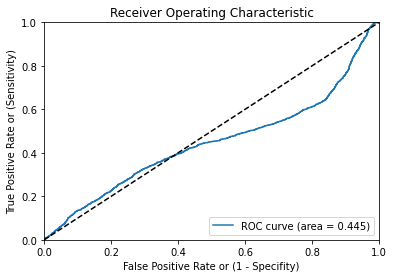

In [28]:
# Train the Logistic Regression model on the unscaled data and print the model score
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr = lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)

print(f'Training Score: {lr.score(X_train, y_train)}')
print(f'Testing Score: {lr.score(X_test, y_test)}')
print()
print("CLASSIFICATION REPORT:")
print(classification_report(y_test, y_pred))
print()
print("CONFUSION MATRIX:")
print(confusion_matrix(y_test, y_pred))

from sklearn.metrics import roc_curve, auc

#ROC Curve
y_proba = lr.predict_proba(X_test)[:, 1]

# Compute fpr, tpr, thresholds and roc auc
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)
# Plot ROC curve
plt.plot(fpr, tpr, label='ROC curve (area = %0.3f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  # random predictions curve
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate or (1 - Specifity)')
plt.ylabel('True Positive Rate or (Sensitivity)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")

plt.show()

Training Score: 1.0
Testing Score: 0.5589111016588686

CLASSIFICATION REPORT:
              precision    recall  f1-score   support

           0       0.58      0.41      0.48      2351
           1       0.55      0.70      0.61      2351

    accuracy                           0.56      4702
   macro avg       0.56      0.56      0.55      4702
weighted avg       0.56      0.56      0.55      4702


CONFUSION MATRIX:
[[ 974 1377]
 [ 697 1654]]


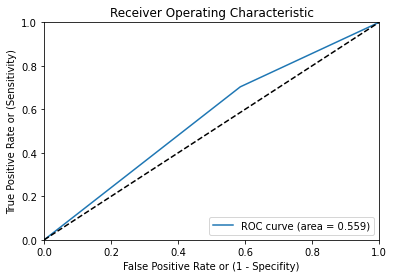

In [29]:
# Train the Decision Tree Classifier model on the unscaled data and print the model score
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=42)
dt = dt.fit(X_train, y_train)

y_pred = dt.predict(X_test)

print(f'Training Score: {dt.score(X_train, y_train)}')
print(f'Testing Score: {dt.score(X_test, y_test)}')
print()
print("CLASSIFICATION REPORT:")
print(classification_report(y_test, y_pred))
print()
print("CONFUSION MATRIX:")
print(confusion_matrix(y_test, y_pred))

#ROC Curve
y_proba = dt.predict_proba(X_test)[:, 1]

# Compute fpr, tpr, thresholds and roc auc
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)
# Plot ROC curve
plt.plot(fpr, tpr, label='ROC curve (area = %0.3f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  # random predictions curve
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate or (1 - Specifity)')
plt.ylabel('True Positive Rate or (Sensitivity)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")

plt.show()

Training Score: 0.9989326765188834
Testing Score: 0.6320714589536367

CLASSIFICATION REPORT:
              precision    recall  f1-score   support

           0       0.69      0.47      0.56      2351
           1       0.60      0.79      0.68      2351

    accuracy                           0.63      4702
   macro avg       0.65      0.63      0.62      4702
weighted avg       0.65      0.63      0.62      4702


CONFUSION MATRIX:
[[1114 1237]
 [ 493 1858]]


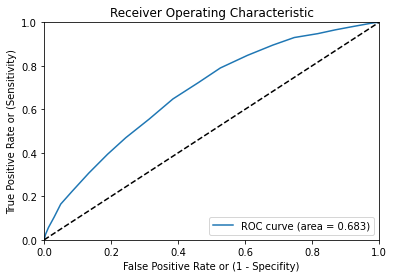

In [30]:
# Train a Random Forest Classifier model on the unscaled data and print the model score
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42, n_estimators=25)
rf = rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

print(f'Training Score: {rf.score(X_train, y_train)}')
print(f'Testing Score: {rf.score(X_test, y_test)}')
print()
print("CLASSIFICATION REPORT:")
print(classification_report(y_test, y_pred))
print()
print("CONFUSION MATRIX:")
print(confusion_matrix(y_test, y_pred))

#ROC Curve
y_proba = rf.predict_proba(X_test)[:, 1]

# Compute fpr, tpr, thresholds and roc auc
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)
# Plot ROC curve
plt.plot(fpr, tpr, label='ROC curve (area = %0.3f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  # random predictions curve
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate or (1 - Specifity)')
plt.ylabel('True Positive Rate or (Sensitivity)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")

plt.show()

In [31]:
# SCALE the data
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Training Score: 0.7078817733990148
Testing Score: 0.767333049766057

CLASSIFICATION REPORT:
              precision    recall  f1-score   support

           0       0.76      0.77      0.77      2351
           1       0.77      0.76      0.77      2351

    accuracy                           0.77      4702
   macro avg       0.77      0.77      0.77      4702
weighted avg       0.77      0.77      0.77      4702


CONFUSION MATRIX:
[[1819  532]
 [ 562 1789]]


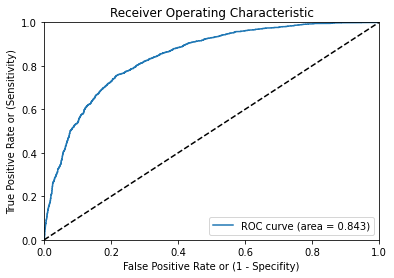

In [32]:
# Train the Logistic Regression model on the SCALED data and print the model score
lr = LogisticRegression()
lr = lr.fit(X_train_scaled, y_train)

y_pred = lr.predict(X_test_scaled)

print(f'Training Score: {lr.score(X_train_scaled, y_train)}')
print(f'Testing Score: {lr.score(X_test_scaled, y_test)}')
print()
print("CLASSIFICATION REPORT:")
print(classification_report(y_test, y_pred))
print()
print("CONFUSION MATRIX:")
print(confusion_matrix(y_test, y_pred))

#ROC Curve
y_proba = lr.predict_proba(X_test_scaled)[:, 1]

# Compute fpr, tpr, thresholds and roc auc
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)
# Plot ROC curve
plt.plot(fpr, tpr, label='ROC curve (area = %0.3f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  # random predictions curve
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate or (1 - Specifity)')
plt.ylabel('True Positive Rate or (Sensitivity)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")

plt.show()

Training Score: 1.0
Testing Score: 0.5595491280306253

CLASSIFICATION REPORT:
              precision    recall  f1-score   support

           0       0.58      0.42      0.49      2351
           1       0.55      0.70      0.61      2351

    accuracy                           0.56      4702
   macro avg       0.56      0.56      0.55      4702
weighted avg       0.56      0.56      0.55      4702


CONFUSION MATRIX:
[[ 981 1370]
 [ 701 1650]]


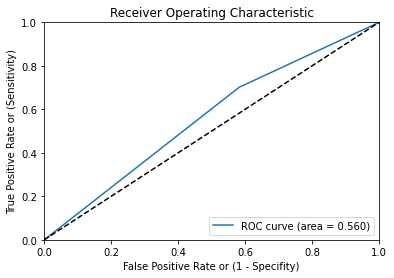

In [33]:
# Train the Decision Tree Classifier model on the SCALED data and print the model score
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=42)
dt = dt.fit(X_train_scaled, y_train)

y_pred = dt.predict(X_test_scaled)

print(f'Training Score: {dt.score(X_train_scaled, y_train)}')
print(f'Testing Score: {dt.score(X_test_scaled, y_test)}')
print()
print("CLASSIFICATION REPORT:")
print(classification_report(y_test, y_pred))
print()
print("CONFUSION MATRIX:")
print(confusion_matrix(y_test, y_pred))

#ROC Curve
y_proba = dt.predict_proba(X_test_scaled)[:, 1]

# Compute fpr, tpr, thresholds and roc auc
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)
# Plot ROC curve
plt.plot(fpr, tpr, label='ROC curve (area = %0.3f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  # random predictions curve
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate or (1 - Specifity)')
plt.ylabel('True Positive Rate or (Sensitivity)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")

plt.show()

Training Score: 0.9989326765188834
Testing Score: 0.6327094853253934

CLASSIFICATION REPORT:
              precision    recall  f1-score   support

           0       0.69      0.47      0.56      2351
           1       0.60      0.79      0.68      2351

    accuracy                           0.63      4702
   macro avg       0.65      0.63      0.62      4702
weighted avg       0.65      0.63      0.62      4702


CONFUSION MATRIX:
[[1115 1236]
 [ 491 1860]]


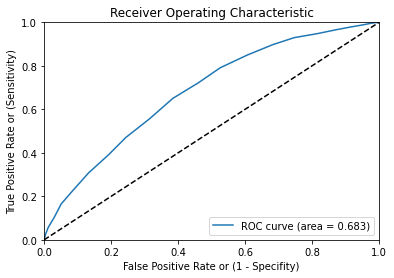

In [35]:
# Train a Random Forest Classifier model on the SCALED data and print the model score
rf = RandomForestClassifier(random_state=42, n_estimators=25)
rf = rf.fit(X_train_scaled, y_train)

y_pred = rf.predict(X_test_scaled)

print(f'Training Score: {rf.score(X_train_scaled, y_train)}')
print(f'Testing Score: {rf.score(X_test_scaled, y_test)}')
print()
print("CLASSIFICATION REPORT:")
print(classification_report(y_test, y_pred))
print()
print("CONFUSION MATRIX:")
print(confusion_matrix(y_test, y_pred))

#ROC Curve
y_proba = rf.predict_proba(X_test_scaled)[:, 1]

# Compute fpr, tpr, thresholds and roc auc
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)
# Plot ROC curve
plt.plot(fpr, tpr, label='ROC curve (area = %0.3f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  # random predictions curve
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate or (1 - Specifity)')
plt.ylabel('True Positive Rate or (Sensitivity)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")

plt.show()

# ANALYSIS

#### With analyzing the unscaled data, I noticed the Random Forest Regression performed better with a ROC of .683. The Unscaled Logistic Regression ROC was .445. The Logistic Regression is not great at predicting high risk with a f-score of 39%. The closer the ROC score is to 1, the more useful it is.
#### Analyzing the scaled data, the Random Forest didnt do so well with the same ROC score of .683. However, the Logistics Regression ROC score increased drastically with a .843. The model is better at predicting high risk with a f-score of 77%.